## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0 :
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(input_layer)
            x = keras.layers.BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(x)
            x = keras.layers.BatchNormalization()(x)
    
    output_layer = keras.layers.Dense(units=output_units,
                                      activation='softmax',
                                      name='output')(x)
    model = keras.models.Model(inputs=[input_layer],
                               outputs=[output_layer])
    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

## 1.試比較 save_best_only 與否的差異

In [18]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint
def model_ckpt(bol):
    return ModelCheckpoint(filepath='./tmp_{}.h5'.format(str(bol)),
                           monitor='val_loss',
                           save_best_only=bol)

target = [True, False]
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bol in target:
    keras.backend.clear_session()
    print('Save Best Only : {}'.format(str(bol)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE,
                                     nesterov=True,
                                     momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy',
                  metrics=['accuracy'],
                  optimizer=optimizer)
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=[model_ckpt(bol)])
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = 'save_best_only {}'.format(str(bol))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc' : train_acc,
                             'valid-acc' : valid_acc}

Save Best Only : True
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 1

50000/50000 [==============================] - 4s 81us/step - loss: 0.5829 - accuracy: 0.8273 - val_loss: 1.6249 - val_accuracy: 0.4899
Epoch 47/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.5660 - accuracy: 0.8338 - val_loss: 1.6329 - val_accuracy: 0.4948
Epoch 48/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.5485 - accuracy: 0.8401 - val_loss: 1.6460 - val_accuracy: 0.4887
Epoch 49/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.5299 - accuracy: 0.8487 - val_loss: 1.6455 - val_accuracy: 0.4888
Epoch 50/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.5148 - accuracy: 0.8557 - val_loss: 1.6619 - val_accuracy: 0.4927
Save Best Only : False
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________________________________

50000/50000 [==============================] - 4s 86us/step - loss: 0.6427 - accuracy: 0.8029 - val_loss: 1.5372 - val_accuracy: 0.4965
Epoch 42/50
50000/50000 [==============================] - 4s 82us/step - loss: 0.6247 - accuracy: 0.8108 - val_loss: 1.5427 - val_accuracy: 0.4977
Epoch 43/50
50000/50000 [==============================] - 4s 83us/step - loss: 0.6063 - accuracy: 0.8175 - val_loss: 1.5831 - val_accuracy: 0.5004
Epoch 44/50
50000/50000 [==============================] - 4s 82us/step - loss: 0.5891 - accuracy: 0.8236 - val_loss: 1.5725 - val_accuracy: 0.4966
Epoch 45/50
50000/50000 [==============================] - 4s 83us/step - loss: 0.5710 - accuracy: 0.8287 - val_loss: 1.5865 - val_accuracy: 0.5005
Epoch 46/50
50000/50000 [==============================] - 4s 83us/step - loss: 0.5553 - accuracy: 0.8382 - val_loss: 1.5854 - val_accuracy: 0.4961
Epoch 47/50
50000/50000 [==============================] - 4s 83us/step - loss: 0.5367 - accuracy: 0.8446 - val_loss: 1.6020

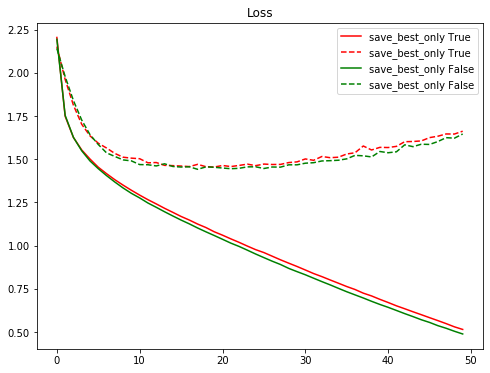

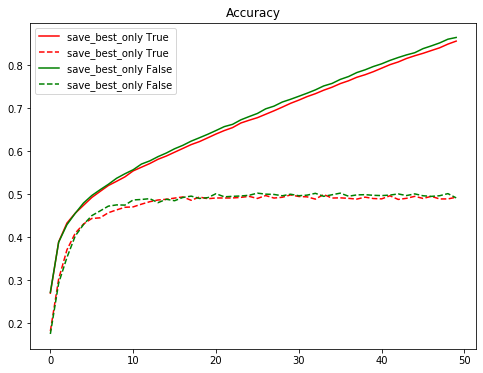

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color = ['r', 'g']

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'],'--', label=cond, color=color[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'],'--', label=cond, color=color[i])
plt.title('Accuracy')
plt.legend()
plt.show()

## 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [23]:
#load
model = keras.models.load_model('./tmp_True.h5')
print('test after load : ', model.predict(x_test[0:2]))

test after load :  [[1.5118722e-02 6.7654647e-02 1.1502419e-01 3.0445397e-01 4.4127129e-02
  4.0307246e-02 3.6674434e-01 3.1274254e-03 3.7045658e-02 6.3966010e-03]
 [1.5153471e-02 4.9310565e-02 6.1677216e-04 4.2953505e-04 1.2867717e-04
  3.3358403e-04 4.4469535e-04 3.9522839e-04 3.5238472e-01 5.8080274e-01]]
